In [1]:
# all imports
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    accuracy_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)
import joblib



In [2]:
# set a random seed 
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)

# navigate to the dataset folder
cwd = os.getcwd()
data_set = os.path.join(cwd, "WBCD-Dataset")
print(os.listdir(data_set))


['cancer_historical.csv', 'features.csv', 'targets.csv']


In [3]:
# build direct paths to the datasets
feature_path = os.path.join(data_set, "features.csv")
target_path = os.path.join(data_set, "targets.csv")

# load the datasets
# each row is one patient data
# each column of inputs: one feature (e.g., radius, texture, etc.)
x_df = pd.read_csv(feature_path)
y_df = pd.read_csv(target_path)



In [4]:
# print the shapes of each df
print(f"Input dataframe shape: {x_df.shape}")
print(f"Input dataframe shape: {x_df.shape}")

Input dataframe shape: (599, 9)
Input dataframe shape: (599, 9)


In [5]:
# convert the df into numpy arrays
x = x_df.values   # features as numpy array
y = y_df.values.squeeze()   # targets as 1D numpy array

print("\nAfter conversion to NumPy arrays:")
print("X shape:", x.shape)      # (n_samples, n_features)
print("y shape:", y.shape)      # (n_samples,)

# Print the data types
print("X type :", type(x))      # should be <class 'numpy.ndarray'>
print("y type :", type(y))      # should be <class 'numpy.ndarray'>


After conversion to NumPy arrays:
X shape: (599, 9)
y shape: (599, 2)
X type : <class 'numpy.ndarray'>
y type : <class 'numpy.ndarray'>


In [6]:
# ==== 5. Convert one-hot targets to class labels and train/test split ====
# y has shape (n_samples, 2) with one-hot encoding:
#   [1, 0] -> class 0 (benign)
#   [0, 1] -> class 1 (malignant)

y_class = np.argmax(y, axis=1)   # shape (n_samples,)
print("\nTarget conversion:")
print("Original y shape (one-hot):", y.shape)
print("y_class shape (1D labels):", y_class.shape)


Target conversion:
Original y shape (one-hot): (599, 2)
y_class shape (1D labels): (599,)


In [7]:
# Use a fixed random_state so that the split is reproducible
X_train, X_test, Y_train, Y_test = train_test_split(
    x,
    y_class,
    test_size = 0.2,    # 80% for training, 20% for test
    random_state = RANDOM_SEED,
    stratify = y_class  # keep class balance similar in test/train
)

print("\nAfter train/test split:")
print("X_train shape:", X_train.shape)
print("X_test shape :", X_test.shape)
print("y_train shape:", Y_train.shape)
print("y_test shape :", Y_test.shape)


After train/test split:
X_train shape: (479, 9)
X_test shape : (120, 9)
y_train shape: (479,)
y_test shape : (120,)


In [8]:
# build a simple MLP Model with training progress

# first scale the data (simple and explicit)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # fit on train data
X_test_scaled = scaler.transform(X_test) # apply to test only

# define a simple MLP Classifier
mlp = MLPClassifier(
    hidden_layer_sizes = (16,8),   # two hidden layers
    activation = "relu",
    max_iter = 1000,
    random_state = RANDOM_SEED,
    verbose = True    # this will show training progress
    
)

# Train the model
print("\nTraining MLP model")
mlp.fit(X_train_scaled, Y_train)
print("Training Finished.")


Training MLP model
Iteration 1, loss = 1.13799708
Iteration 2, loss = 1.10111921
Iteration 3, loss = 1.06583771
Iteration 4, loss = 1.03236581
Iteration 5, loss = 0.99998159
Iteration 6, loss = 0.97035056
Iteration 7, loss = 0.94092188
Iteration 8, loss = 0.91371231
Iteration 9, loss = 0.88768309
Iteration 10, loss = 0.86346694
Iteration 11, loss = 0.84011661
Iteration 12, loss = 0.81814873
Iteration 13, loss = 0.79707821
Iteration 14, loss = 0.77681750
Iteration 15, loss = 0.75723621
Iteration 16, loss = 0.73860681
Iteration 17, loss = 0.72026742
Iteration 18, loss = 0.70291326
Iteration 19, loss = 0.68591745
Iteration 20, loss = 0.66946299
Iteration 21, loss = 0.65342878
Iteration 22, loss = 0.63784511
Iteration 23, loss = 0.62219758
Iteration 24, loss = 0.60721267
Iteration 25, loss = 0.59240681
Iteration 26, loss = 0.57782530
Iteration 27, loss = 0.56337166
Iteration 28, loss = 0.54940089
Iteration 29, loss = 0.53534340
Iteration 30, loss = 0.52179747
Iteration 31, loss = 0.508530

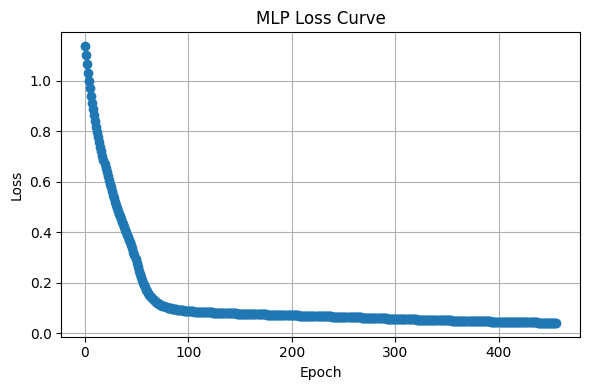

In [9]:
# Plot the training loss curve 
plt.figure(figsize=(6,4))
plt.plot(mlp.loss_curve_, marker="o")
plt.title("MLP Loss Curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.tight_layout()
plt.show()

In [10]:
# save the model and scaler
model_path = "wbcd_mlp_model.pkl"
scaler_path = "wbcd_scaler.pkl"

joblib.dump(mlp, model_path)
joblib.dump(scaler, scaler_path)

print(f"\nSaved MLP model to   : {model_path}")
print(f"Saved scaler to       : {scaler_path}")


Saved MLP model to   : wbcd_mlp_model.pkl
Saved scaler to       : wbcd_scaler.pkl


In [11]:
# Evaluate model: accuracy on test and train sets
# use scaled data for the predictions
y_train_pred = mlp.predict(X_train_scaled)
y_test_pred = mlp.predict(X_test_scaled)

train_acc = accuracy_score(Y_train, y_train_pred)
test_acc = accuracy_score(Y_test, y_test_pred)

print("\n=== Accuracy ===")
print(f"Train accuracy: {train_acc:.3f}")
print(f"Test  accuracy: {test_acc:.3f}")


=== Accuracy ===
Train accuracy: 0.979
Test  accuracy: 0.967


In [12]:
# confusion matrix
# y_test and y_test_pred are 1D arrays with labels 0 or 1

unique_classes = np.unique(Y_test)

cm = confusion_matrix(Y_test, y_test_pred, labels = unique_classes)

print("\nConfusion Matrix (rows = true, columns = predicted):")
print(cm)


Confusion Matrix (rows = true, columns = predicted):
[[76  3]
 [ 1 40]]


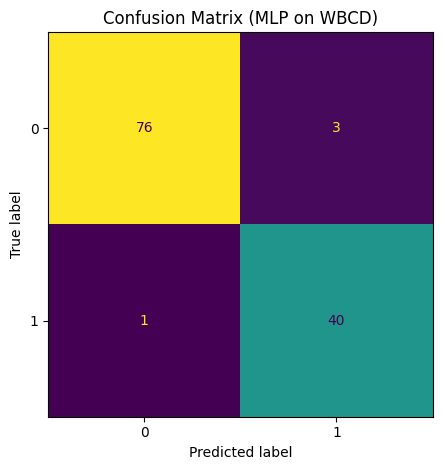

In [13]:
# plot the confusion matrix
fig_cm, ax_cm = plt.subplots()
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=unique_classes)
disp.plot(ax=ax_cm, colorbar=False)
ax_cm.set_title("Confusion Matrix (MLP on WBCD)")
plt.tight_layout()